In [91]:
# libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date

In [92]:
objects = ['AAPL',
           'CL=F']

In [93]:
df = web.DataReader(objects[1], data_source='yahoo', start='2012-01-01', end=date.today())

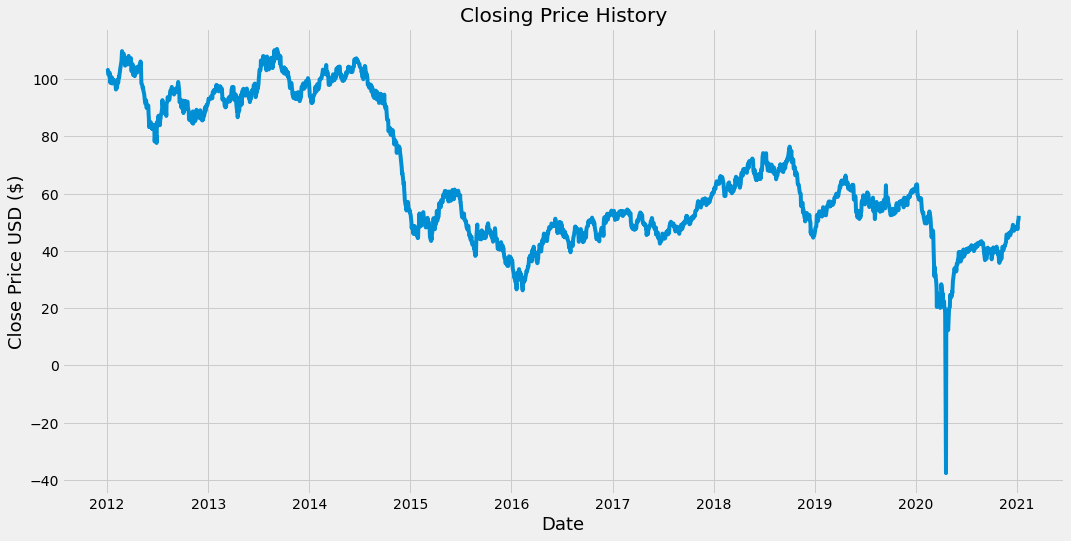

In [94]:
# visualization of closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [95]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

In [96]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [97]:
periods = [5,10,20,30]
period = 5

In [98]:
train_data = scaled_data[ : training_data_len , : ]
x_train = []
y_train = []
for i in range(period,len(train_data)):
  x_train.append(train_data[i-period : i , 0])
  y_train.append(train_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1795, 5)
(1795, 5, 1)


In [99]:
test_data = scaled_data[training_data_len - period : , : ]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(period,len(test_data)):
  x_test.append(test_data[i-period : i , 0])
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(449, 5)
(449, 5, 1)


In [100]:
layers = [1,2,3,4]
neurons = [10,20,30,40,50,60]
neurons_num = 60
dropouts = [0.0,0.1,0.2,0.3,0.4,0.5]
dropout = dropouts[5]

In [108]:
model = Sequential()
model.add(LSTM(neurons_num, input_shape=(x_train.shape[1],1)))
model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=15)

Epoch 1/15
1795/1795 [==============================] - 4s 1ms/step - loss: 0.0450
Epoch 2/15
1795/1795 [==============================] - 3s 2ms/step - loss: 0.0069
Epoch 3/15
1795/1795 [==============================] - 3s 1ms/step - loss: 0.0039
Epoch 4/15
1795/1795 [==============================] - 3s 2ms/step - loss: 0.0020
Epoch 5/15
1795/1795 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 6/15
1795/1795 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 7/15
1795/1795 [==============================] - 3s 2ms/step - loss: 8.6234e-04
Epoch 8/15
1795/1795 [==============================] - 3s 2ms/step - loss: 8.5985e-04
Epoch 9/15
1795/1795 [==============================] - 3s 1ms/step - loss: 7.9878e-04
Epoch 10/15
1795/1795 [==============================] - 3s 1ms/step - loss: 9.3281e-04
Epoch 11/15
1795/1795 [==============================] - 2s 1ms/step - loss: 8.1964e-04
Epoch 12/15
1795/1795 [==============================] - 2s 1ms/s

In [109]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

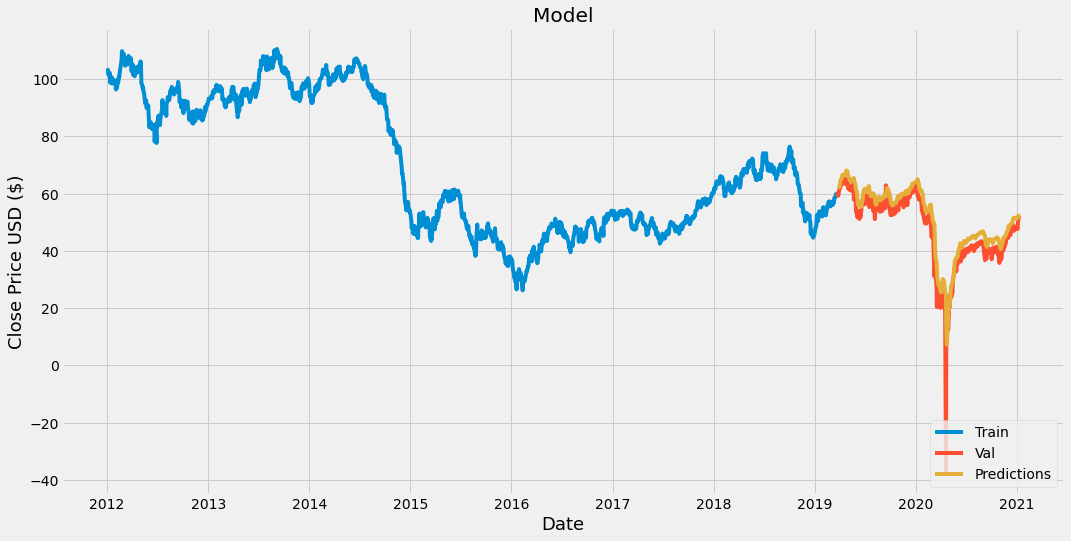

3.4724931971798494

In [110]:
train = data[ : training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse